In [1082]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

In [1083]:
df = pd.read_csv('../Data/spaceship_titanic_dataset.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1084]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8878 non-null   object 
 1   HomePlanet    8673 non-null   object 
 2   CryoSleep     8656 non-null   object 
 3   Cabin         8676 non-null   object 
 4   Destination   8691 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8667 non-null   object 
 7   RoomService   8695 non-null   float64
 8   FoodCourt     8694 non-null   float64
 9   ShoppingMall  8666 non-null   float64
 10  Spa           8692 non-null   float64
 11  VRDeck        8684 non-null   float64
 12  Name          8673 non-null   object 
 13  Transported   8878 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 910.5+ KB


In [1085]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8695.000000,8694.000000,8666.000000,8692.000000,8684.000000
mean,28.839756,226.318344,455.938463,173.933880,309.497354,306.386112
std,14.500781,668.461056,1603.965161,601.921585,1131.027169,1151.269872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,48.500000,76.000000,28.000000,59.000000,45.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1086]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [1087]:
df.duplicated().sum()

np.int64(185)

In [1088]:
df.drop_duplicates(inplace=True)

In [1089]:
print(df['HomePlanet'].value_counts())
print(df['Destination'].value_counts())
print(df['Cabin'].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64


In [1090]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [1091]:
#df.dropna(subset=['Name'], inplace=True)
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

i will start filling the NaN values

In [1092]:
df['HomePlanet']=df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Destination'] = df.groupby('HomePlanet')['Destination'].transform(
    lambda x: x.fillna(x.mode()[0])
)
df['CryoSleep'] = df.groupby('Destination')['CryoSleep'].transform(
    lambda x: x.fillna(x.mode()[0])
)
df['VIP'] = df.groupby('HomePlanet')['VIP'].transform(
    lambda x: x.fillna(x.mode()[0])
)
df['Age'] = df.groupby('HomePlanet')['Age'].transform(
    lambda x: x.fillna(x.median())
)
df.isna().sum()

C:\Users\moham\AppData\Local\Temp\ipykernel_15908\4272483059.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0])
C:\Users\moham\AppData\Local\Temp\ipykernel_15908\4272483059.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0])


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

the expenses must be zero if the passenger is in a cryosleep

In [1093]:
expense_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
expense_means = df[expense_cols].mean()
for col in expense_cols: df.loc[df['CryoSleep'] == True, col] = 0
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
dtype: int64

In [1094]:
df.duplicated().sum()

np.int64(0)

In [1095]:
df['Cabin'] = df.groupby('Destination')['Cabin'].transform(
    lambda x: x.fillna(x.mode()[0])
)
df[expense_cols] = df.groupby('VIP')[expense_cols].transform(
    lambda x: x.fillna(x.mean())
)
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

I knew that it is recommended to slplit cabin number so i will split it to deck, cabin_num and side

In [1096]:
df.drop(columns=['PassengerId', 'Name'], inplace=True)
# Split Cabin into Deck, Number, Side
df[['Deck','CabinNum','Side']] = df['Cabin'].str.split('/', expand=True)

# Convert CabinNum to numeric
df['CabinNum'] = pd.to_numeric(df['CabinNum'], errors='coerce')
df.duplicated().sum()


np.int64(23)

In [1097]:
df.drop_duplicates(inplace=True)
df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0,P
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,2,S
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,G,0,S
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,F,3,S
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1,P


In [1098]:
print((df == 0).sum())

HomePlanet         0
CryoSleep       5653
Cabin              0
Destination        0
Age              175
VIP             8471
RoomService     5622
FoodCourt       5503
ShoppingMall    5660
Spa             5366
VRDeck          5534
Transported     4314
Deck               0
CabinNum          18
Side               0
dtype: int64


All the features can be zero except for age so i will change it

In [1099]:

df['Age'] = df['Age'].replace(0, df['Age'].mode()[0])
print((df == 0).sum())


HomePlanet         0
CryoSleep       5653
Cabin              0
Destination        0
Age                0
VIP             8471
RoomService     5622
FoodCourt       5503
ShoppingMall    5660
Spa             5366
VRDeck          5534
Transported     4314
Deck               0
CabinNum          18
Side               0
dtype: int64


In [1100]:
print(df.duplicated().sum())



1


In [1101]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [1102]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
CabinNum        0
Side            0
dtype: int64

Now i finished cleaning the data

In [1103]:
df.drop(columns=['Cabin'], inplace=True )
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8669 non-null   object 
 1   CryoSleep     8669 non-null   bool   
 2   Destination   8669 non-null   object 
 3   Age           8669 non-null   float64
 4   VIP           8669 non-null   bool   
 5   RoomService   8669 non-null   float64
 6   FoodCourt     8669 non-null   float64
 7   ShoppingMall  8669 non-null   float64
 8   Spa           8669 non-null   float64
 9   VRDeck        8669 non-null   float64
 10  Transported   8669 non-null   bool   
 11  Deck          8669 non-null   object 
 12  CabinNum      8669 non-null   int64  
 13  Side          8669 non-null   object 
dtypes: bool(3), float64(6), int64(1), object(4)
memory usage: 770.5+ KB


In [1104]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


I will start visualizing and understanding the data distribution


C:\Users\moham\AppData\Local\Temp\ipykernel_15908\2065884683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


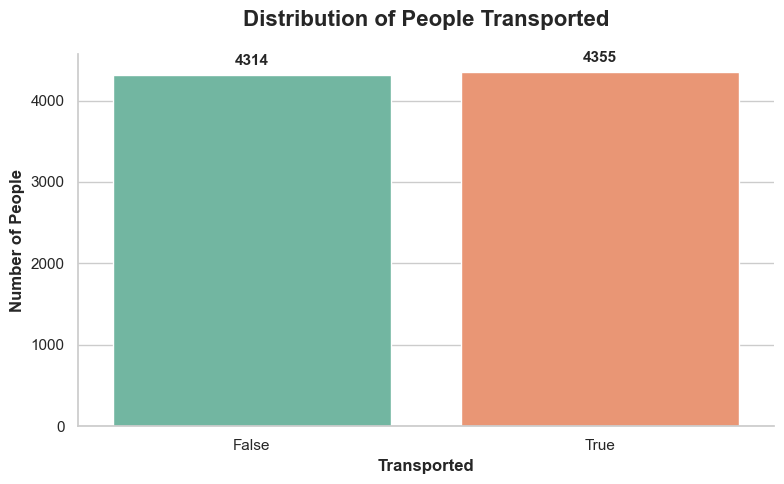

In [1105]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df, 
    x='Transported', 
    palette='Set2' 
)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=11, 
        fontweight='bold'
    )

plt.title("Distribution of People Transported", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Transported", fontsize=12, fontweight='bold')
plt.ylabel("Number of People", fontsize=12, fontweight='bold')

sns.despine()

plt.tight_layout()
plt.show()

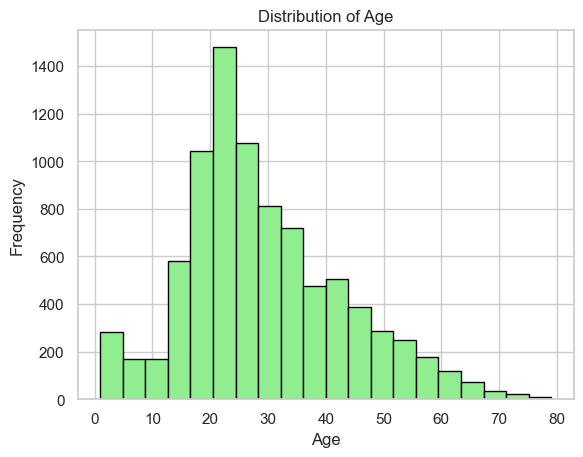

In [1106]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

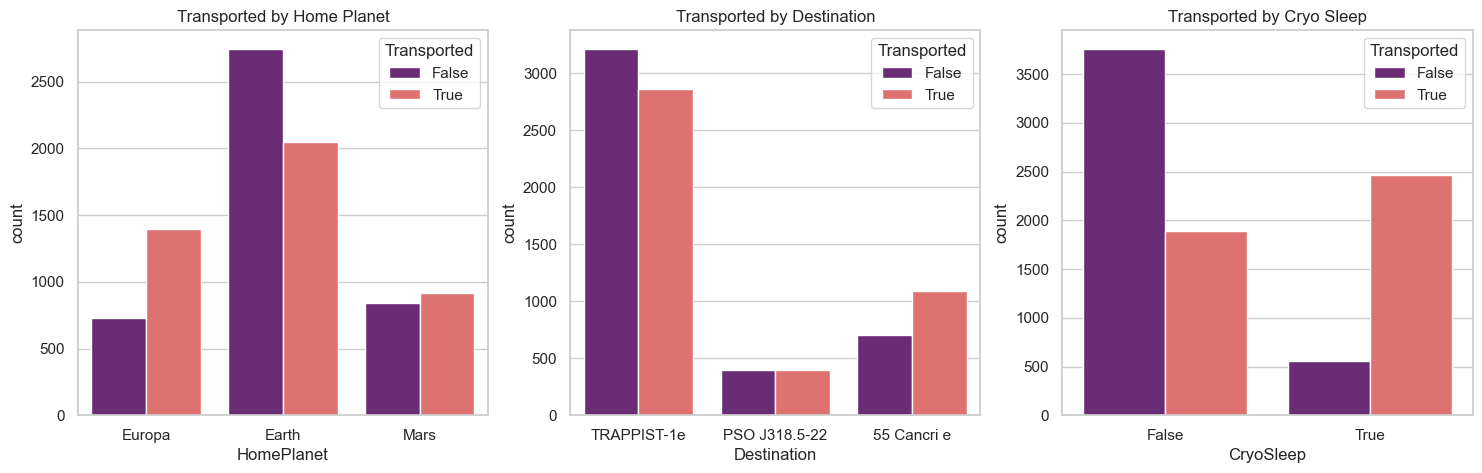

In [1107]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='HomePlanet', hue='Transported', data=df, ax=axes[0], palette='magma')
axes[0].set_title('Transported by Home Planet')
sns.countplot(x='Destination', hue='Transported', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Transported by Destination')
sns.countplot(x='CryoSleep', hue='Transported', data=df, ax=axes[2], palette='magma')
axes[2].set_title('Transported by Cryo Sleep')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_15908\1753920104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transported', y='Age', data=df, palette='Set2')


Text(0.5, 1.0, 'Age vs Transported')

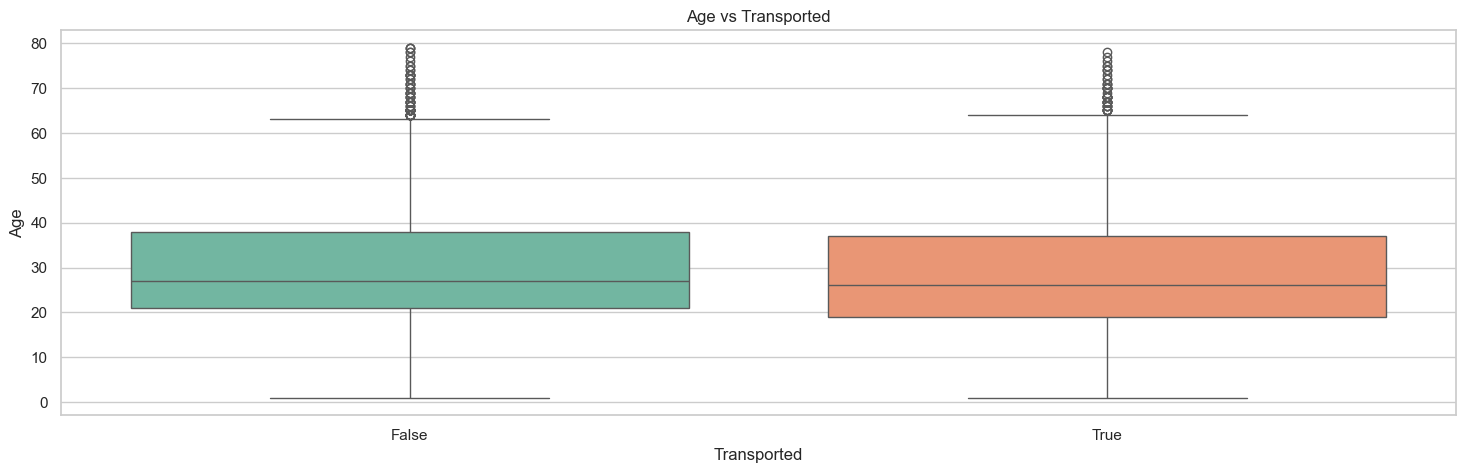

In [1108]:
fig, axes = plt.subplots(1, 1, figsize=(18, 5))
sns.boxplot(x='Transported', y='Age', data=df, palette='Set2')
axes.set_title('Age vs Transported')


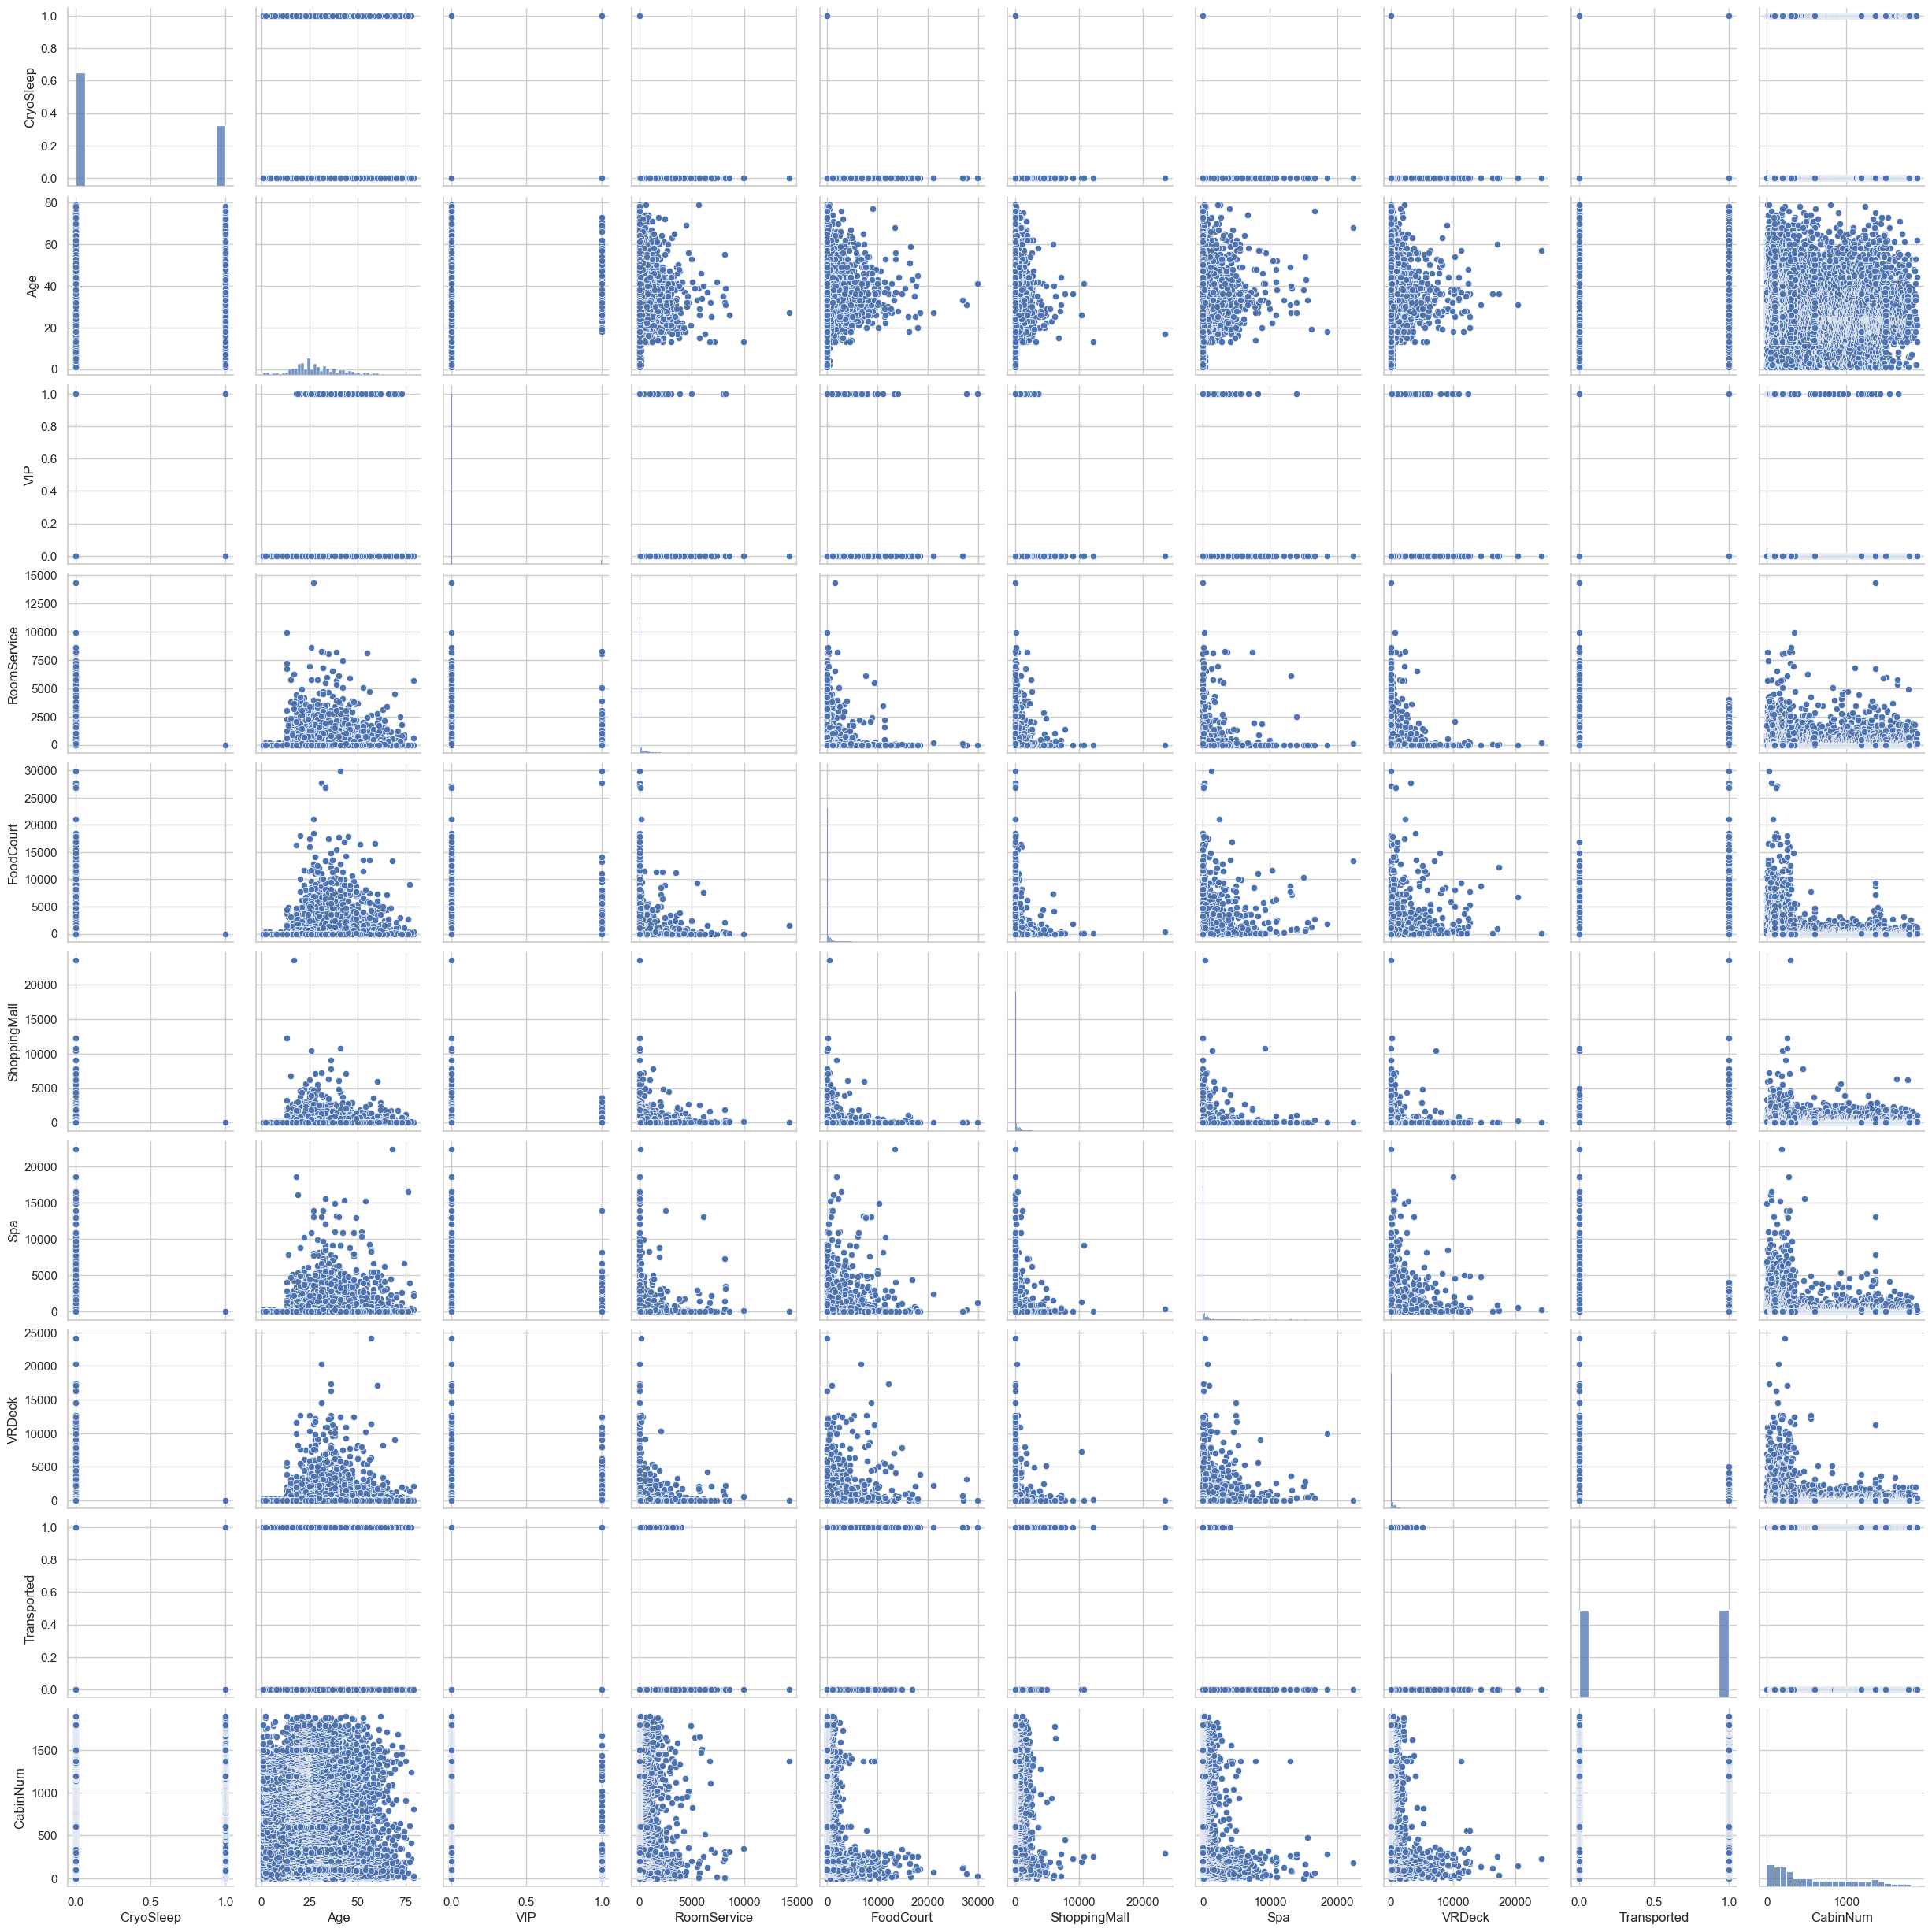

In [1109]:
sns.pairplot(df)
plt.show()

In [1110]:
df['IsKid'] = df['Age'] < 18
df["TotalExpenses"] = df[expense_cols].sum(axis=1)
df["TotalExpenses"] = np.where(df["VIP"], df["TotalExpenses"] ** 2, df["TotalExpenses"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8669 non-null   object 
 1   CryoSleep      8669 non-null   bool   
 2   Destination    8669 non-null   object 
 3   Age            8669 non-null   float64
 4   VIP            8669 non-null   bool   
 5   RoomService    8669 non-null   float64
 6   FoodCourt      8669 non-null   float64
 7   ShoppingMall   8669 non-null   float64
 8   Spa            8669 non-null   float64
 9   VRDeck         8669 non-null   float64
 10  Transported    8669 non-null   bool   
 11  Deck           8669 non-null   object 
 12  CabinNum       8669 non-null   int64  
 13  Side           8669 non-null   object 
 14  IsKid          8669 non-null   bool   
 15  TotalExpenses  8669 non-null   float64
dtypes: bool(4), float64(7), int64(1), object(4)
memory usage: 846.7+ KB


i will add this because the passenger is more likely to be transported if they are underage


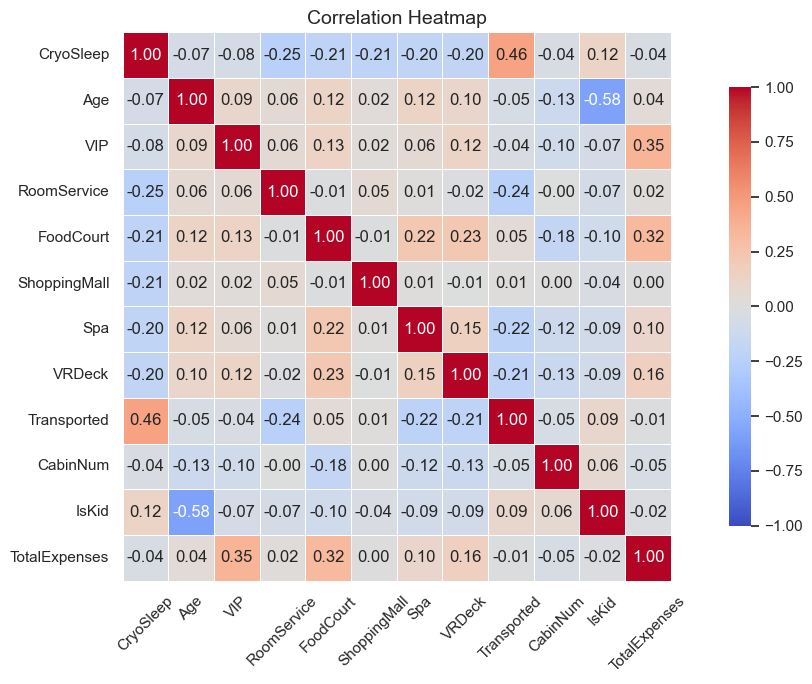

In [1111]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 7))

sns.heatmap(
    corr,
    annot=True,          # show numbers
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # color map
    vmin=-1, vmax=1,     # correlation range
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [1112]:
print(df['Deck'].value_counts())
print(df['Side'].value_counts())

Deck
F    2807
G    2680
E     876
B     823
C     745
D     477
A     256
T       5
Name: count, dtype: int64
Side
P    4389
S    4280
Name: count, dtype: int64


In [1113]:
df.drop(columns=['Deck'], inplace=True)

In [1114]:
from sklearn.preprocessing import OneHotEncoder

# columns
cat_cols = ['HomePlanet', 'Destination', 'Side']
# Create encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder
encoded_cat = ohe.fit_transform(df[cat_cols])

# Convert to DataFrame
encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=ohe.get_feature_names_out(cat_cols)
)

df = pd.concat([df, encoded_cat_df], axis=1)
df.drop(columns=cat_cols, inplace=True)

# Save everything
joblib.dump(ohe, "../Models/ohe.pkl")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8669 non-null   bool   
 1   Age                        8669 non-null   float64
 2   VIP                        8669 non-null   bool   
 3   RoomService                8669 non-null   float64
 4   FoodCourt                  8669 non-null   float64
 5   ShoppingMall               8669 non-null   float64
 6   Spa                        8669 non-null   float64
 7   VRDeck                     8669 non-null   float64
 8   Transported                8669 non-null   bool   
 9   CabinNum                   8669 non-null   int64  
 10  IsKid                      8669 non-null   bool   
 11  TotalExpenses              8669 non-null   float64
 12  HomePlanet_Earth           8669 non-null   float64
 13  HomePlanet_Europa          8669 non-null   float

i will start splitting the data and making the models

In [1115]:
from sklearn.preprocessing import OneHotEncoder
#X = features, y = target
X = df.drop('Transported', axis=1)
y = df['Transported']

#Split into train+validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Split train+validation into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# Now I have:
# Training set: 60% of data
# Validation set: 20% of data
# Test set: 20% of data 

num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',
            'CabinNum','TotalExpenses','CryoSleep','VIP','IsKid']   

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train_val[num_cols] = scaler.transform(X_train_val[num_cols])

joblib.dump(scaler, "../Models/scaler.pkl")
joblib.dump(X_train.columns.tolist(), "../Models/columns.pkl")
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape
X_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6935 entries, 312 to 7110
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6935 non-null   float64
 1   Age                        6935 non-null   float64
 2   VIP                        6935 non-null   float64
 3   RoomService                6935 non-null   float64
 4   FoodCourt                  6935 non-null   float64
 5   ShoppingMall               6935 non-null   float64
 6   Spa                        6935 non-null   float64
 7   VRDeck                     6935 non-null   float64
 8   CabinNum                   6935 non-null   float64
 9   IsKid                      6935 non-null   float64
 10  TotalExpenses              6935 non-null   float64
 11  HomePlanet_Earth           6935 non-null   float64
 12  HomePlanet_Europa          6935 non-null   float64
 13  HomePlanet_Mars            6935 non-null   float64


In [1116]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(classification_report(y_test, y_pred))
    

Evaluating Logistic Regression on Test Set:
Accuracy Score:  0.7912341407151096


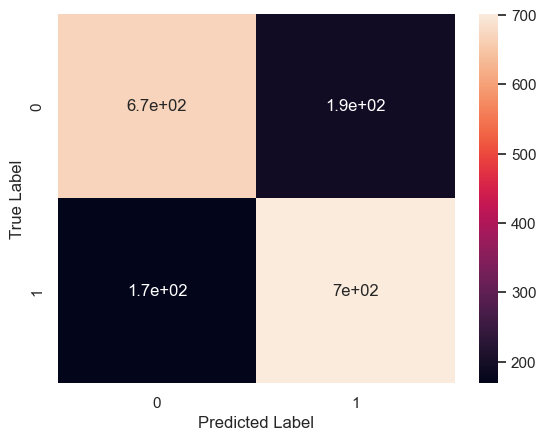

              precision    recall  f1-score   support

       False       0.80      0.78      0.79       863
        True       0.78      0.81      0.80       871

    accuracy                           0.79      1734
   macro avg       0.79      0.79      0.79      1734
weighted avg       0.79      0.79      0.79      1734

Evaluating Logistic Regression on Training Set:
Accuracy Score:  0.7942321557317953


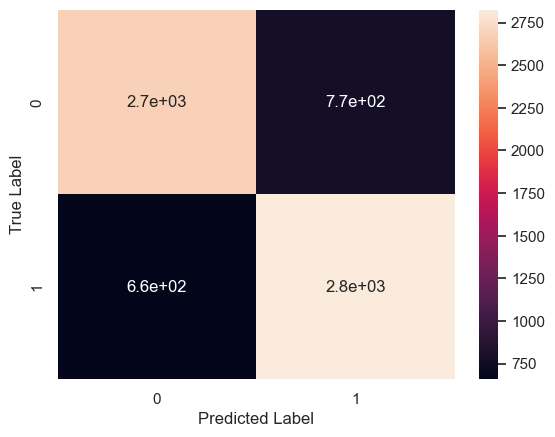

              precision    recall  f1-score   support

       False       0.80      0.78      0.79      3451
        True       0.79      0.81      0.80      3484

    accuracy                           0.79      6935
   macro avg       0.79      0.79      0.79      6935
weighted avg       0.79      0.79      0.79      6935



In [1117]:
lgr = LogisticRegression()
print("Evaluating Logistic Regression on Test Set:")
train_and_evaluate(lgr, X_train_val, y_train_val, X_test, y_test)
print("Evaluating Logistic Regression on Training Set:")
train_and_evaluate(lgr, X_train_val, y_train_val, X_train_val, y_train_val)

In [1118]:
# Finding the best K value
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_val, y_val))

best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K value found: {best_k}")


Best K value found: 27


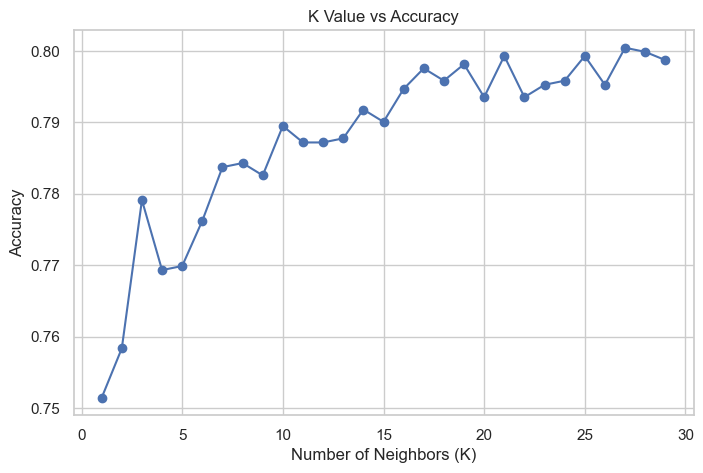

In [1119]:
# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('knn_accuracy_plot.png')

In [1120]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train)
print("KNN Accuracy on Testing Set:")
print(knn_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy on Training Set:")
print(knn_model.score(X_train, y_train))
print(classification_report(y_train, y_pred_train_knn))

KNN Accuracy on Testing Set:
0.7808535178777394
              precision    recall  f1-score   support

       False       0.76      0.81      0.79       863
        True       0.80      0.75      0.78       871

    accuracy                           0.78      1734
   macro avg       0.78      0.78      0.78      1734
weighted avg       0.78      0.78      0.78      1734

KNN Accuracy on Training Set:
0.7869640453758893
              precision    recall  f1-score   support

       False       0.77      0.81      0.79      2588
        True       0.80      0.77      0.78      2613

    accuracy                           0.79      5201
   macro avg       0.79      0.79      0.79      5201
weighted avg       0.79      0.79      0.79      5201



In [1121]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


Since Keras models don’t plug directly into scikit-learn’s GridSearchCV, i need to wrap my model in a scikit-learn compatible estimator using KerasClassifier from scikeras.wrappers.

In [ ]:
'''from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import keras

def build_model(neurons1=128, neurons2=64, learning_rate=0.001, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(neurons1, activation='relu', input_shape=(19,)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(neurons2, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    opt = keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == 'adam' else keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_fn=build_model, verbose=0)
keras_clf._estimator_type = "classifier"

# Define hyperparameter distribution
param_dist = {
    'model__optimizer': ['adam', 'sgd'],
    'model__neurons1': [128, 256],
    'model__neurons2': [64, 128],
    'model__learning_rate': [0.001], # Added for more variety
    'epochs': [50, 100],
    'batch_size': [16],
}
# Random Search with 3-fold cross-validation (it automatically split the data to train and validation)
random_search = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=18
)
random_result = random_search.fit(X_train_val, y_train_val)

print("Best parameters:", random_result.best_params_)
print("Best CV score:", random_result.best_score_)
'''

'from scikeras.wrappers import KerasClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nimport keras\n\ndef build_model(neurons1=128, neurons2=64, learning_rate=0.001, optimizer=\'adam\'):\n    model = keras.Sequential([\n        keras.layers.Dense(neurons1, activation=\'relu\', input_shape=(19,)),\n        keras.layers.Dropout(0.1),\n        keras.layers.Dense(neurons2, activation=\'relu\'),\n        keras.layers.Dense(32, activation=\'relu\'),\n        keras.layers.Dense(1, activation=\'sigmoid\')\n    ])\n    opt = keras.optimizers.Adam(learning_rate=learning_rate) if optimizer == \'adam\' else keras.optimizers.SGD(learning_rate=learning_rate)\n    model.compile(optimizer=opt, loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    return model\n\nkeras_clf = KerasClassifier(build_fn=build_model, verbose=0)\nkeras_clf._estimator_type = "classifier"\n\n# Define hyperparameter distribution\nparam_dist = {\n    \'model__optimizer\': [\'adam\', \'sgd\'],\n    \'model_

i ran this on colab to run faster and used the best parameters in the next code block

In [1127]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(19,)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_val, y_train_val, epochs=100, batch_size=16)

Epoch 1/100


d:\Apps\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.6871 - loss: 0.6248
Epoch 2/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.7753 - loss: 0.4908
Epoch 3/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.7889 - loss: 0.4514
Epoch 4/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.7921 - loss: 0.4392
Epoch 5/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.7950 - loss: 0.4320
Epoch 6/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8004 - loss: 0.4268
Epoch 7/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.8001 - loss: 0.4240
Epoch 8/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7967 - loss: 0.4235
Epoch 9/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.7970 - loss: 0.4228
Epoch 10/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8004 - loss: 0.4206
Epoch 11/100
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7996 - loss: 0.4195
Epoch 12/100
434/434 ━━━━━━━━━━

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.3972
Test Loss: 0.40, Test Accuracy: 80.10%
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


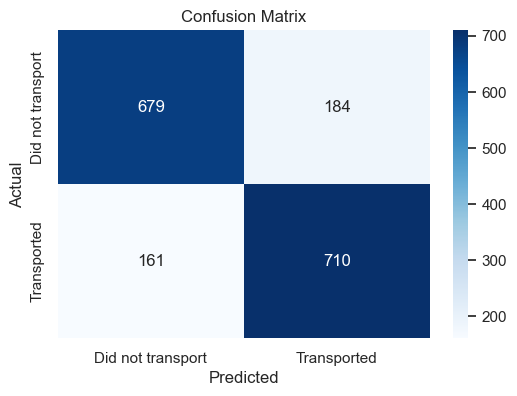

              precision    recall  f1-score   support

       False       0.81      0.79      0.80       863
        True       0.79      0.82      0.80       871

    accuracy                           0.80      1734
   macro avg       0.80      0.80      0.80      1734
weighted avg       0.80      0.80      0.80      1734



In [1124]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy*100:.2f}%")
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did not transport', 'Transported'], 
            yticklabels=['Did not transport', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

In [1125]:
model.save("../Models/spaceship_model.h5")